**Learning objective**  
  
  
In Week3, we are going to build a neural network with one hidden layer, using forward propagation and backpropagation.  
- Describe hidden units and hidden layers  
- Use units with a non-linear activation function, such as tanh  
- Implement forward and backward propagation
- Apply random initialization to your neural network
- Increase fluency in Deep Learning notations and Neural Network --- Representations
- Implement a 2-class classification neural network with a single hidden - layer
- Compute the cross entropy loss  



# Shallow Neural Networks(NN)  

## NN overview  

This is a neural network
<img src="images/NN overview.png" width="400">

$[1], \ [2] $ represents different layers. Also remember that $(i)$ are used to represent different training samples.  


## NN representation
Let us firstly get familiar with some representaions of each parts in a neural networks plot.

## Computing a Neural Networks' output

Here is a single hidden layer neural network:  
<img src="images/single hidden NN.png" width="400">  

The following NN just do this process for several times:  
<img src="images/NNseveral.png" width="400">  

Let's see some computional details in this Neural Networks.  
- Firstly, Let us see the 1st node in the 1st layer.  
  <img src="images/1l1n.png" width="300">  
  $z^{[1]}_1 = w^{[1]T}_1 \cdot x + b^{[1]}_1$  
  $a^{[1]}_1 = \sigma (z^{[1]}_1)$  
    
  remember that in $a^{[1] \leftarrow \text{layer}}_{1 \leftarrow \text{node in layer}}$  
- Secondly, Let us see the 2nd node in the 1st layer.  
  <img src="images/1l2n.png" width="300">  
  $z^{[1]}_2 = w^{[1]T}_2 \cdot x + b^{[1]}_2$  
  $a^{[1]}_2 = \sigma (z^{[1]}_2)$  
- Implement the same process to each node  
  <img src="images/fullversion.png" width="600">  

We are going to vectorize these four equations.   

$z^{[1]} = \left[\begin{array}{lll}w_1^{[1] T} & w_1^{[1] T} & w_1^{[1] T} \\ w_2^{[1]T} & w_2^{[1] T} & w_2^{[1] T} \\ w_3^{[1] T} & w_3^{[1] T} & w_3^{[1] T} \\ w_4^{[1] T} & w_4^{[1] T} & w_4^{[1] T}\end{array}\right] \cdot \left[\begin{array}{l} x_1 \\ x_2 \\ x_3 \end{array}\right] + \left[\begin{array}{l} b_1^{[1]} \\ b_2^{[1]} \\ b_3^{[1]} \\ b_4^{[1]} \end{array}\right] = \left[\begin{array}{l} w_1^{[1] T} \bold{x} + b_1^{[1]}\\ w_2^{[1] T} \bold{x} + b_2^{[1]} \\ w_3^{[1] T} \bold{x} + b_3^{[1]} \\ w_4^{[1] T} \bold{x} + b_4^{[1]} \end{array}\right] = \left[\begin{array}{l} z_1^{[1]} \\ z_2^{[1]} \\ z_3^{[1]} \\ z_4^{[1]} \end{array}\right]$  

$ a^{[1]} = \left[\begin{array}{l} a_1^{[1]} \\ a_2^{[1]} \\ a_3^{[1]} \\ a_4^{[1]} \end{array}\right] = \sigma(z^{[1]})$

Based on the above equation, we can derive the learning process of the neural networks. $a^{[0]}$ layer stands for the input layer.  
- Given input x:  
  $z^{[1]} = W^{[1]}a^{[0]}+b^{[1]}$  
  $a^{[1]}=\sigma(z^{[1]})$  
  $z^{[2]} = W^{[2]}a^{[1]}+b^{[2]}$  
  $a^{[2]}=\sigma(z^{[2]}) = \hat{y}$


## Vectorizing Across Multiple Examples

In this part, we will vectorize across multiple training examples. And the outcome will be quite similar to what we saw for logistic regression. Whereby stacking up different training examples in different columns of the matrix.  

if we have m training examples, then:  
  
$  x^{(1)} \rightarrow a^{[2](1)}=\hat{y}^{(1)} $  
$  x^{(2)} \rightarrow a^{[2](2)}=\hat{y}^{(2)} $  
$  x^{(3)} \rightarrow a^{[2](3)}=\hat{y}^{(3)} $  
$ \vdots $  
$  x^{(m)} \rightarrow a^{[2](m)}=\hat{y}^{(m)} $   

$ \text{For} \   i=1 \  to \  m:$  
$ \qquad z^{[1](i)} = W^{[1]}x^{[1]}+b^{[1]}$   
$ \qquad a^{[1](i)}=\sigma(z^{[1](i)})$  
$ \qquad z^{[2](i)} = W^{[2]}x^{[2]}+b^{[2]}$  
$ \qquad a^{[2](i)}=\sigma(z^{[2](i)}) $  

So, we are going to vectorize the above process to avoid the for loop.  



Recall that we define the $X$ matrix as following, which is a $[n_x,m]$ matrix:  

$X=\left[\begin{array}{llll}x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\ x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\ \vdots & \vdots & \vdots & \vdots \\ x^{(1)} & x^{(2)} & \cdots & x^{(m)}\end{array}\right] $ 


What we need to do is:  
  

$Z^{[1]}=W^{[1]}X+b^{[1]}$  
$A^{[1]}= \sigma(Z{[1]})$  
$Z^{[2]}=W^{[2]}X+b^{[2]}$  
$A^{[2]}= \sigma(Z{[2]})$  

Remember that $W$ stay the same for the same layer.
  
For example, $Z^{[1]}$ stands for to following matrix:  
  
$Z^{[1]}=\left[\begin{array}{llll}Z^{[1](1)} & Z^{[1](2)} & \cdots & Z^{[1](m)} \\ Z^{[1](1)} & Z^{[1](2)} & \cdots & Z^{[1](m)} \\ \vdots & \vdots & \vdots & \vdots \\ Z^{[1](1)} & Z^{[1](2)} & \cdots & Z^{[1](m)}\end{array}\right] $ 

## Activation functions

### different activation functions  

The sigmoid function can be replaced by other non-linear function $ g (z^{[i]}) $ like tanh function ( $tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ ). Sometimes, different layers have different activation function.

In [14]:
#region Hidden code
import numpy as np
import matplotlib.pyplot as plt
#endregion

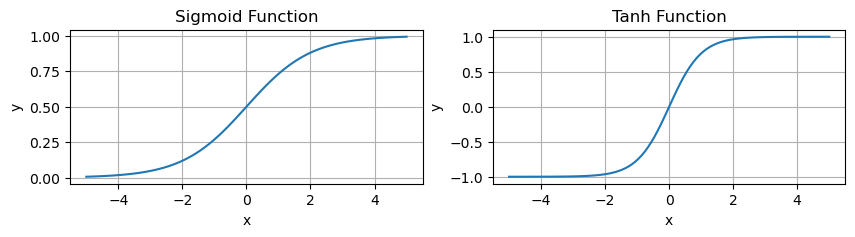

In [12]:
#region Hidden code
# Generate values for x
x = np.linspace(-5, 5, 100)

# Calculate y values for sigmoid and tanh functions
y_sigmoid = 1 / (1 + np.exp(-x))
y_tanh = np.tanh(x)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 2))

# Plot sigmoid function in the first subplot
axs[0].plot(x, y_sigmoid)
axs[0].set_title('Sigmoid Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid()

# Plot tanh function in the second subplot
axs[1].plot(x, y_tanh)
axs[1].set_title('Tanh Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid()

# Show the plot
plt.show()
#endregion

Sigmoid outputs a value between 0 and 1 which makes it a very good choice for binary classification. You can classify as 0 if the output is less than 0.5 and classify as 1 if the output is more than 0.5. It can be done with tanh as well but it is less convenient as the output is between -1 and 1.  

One of the downsides of both the sigmoid function and the tan h function is that if z is either very large or very small, then the gradient of the derivative of the slope of this function becomes very small. So if z is very large or z is very small, the slope of the function either ends up being close to zero and so this can slow down gradient descent. Another choice is ReLu function.  

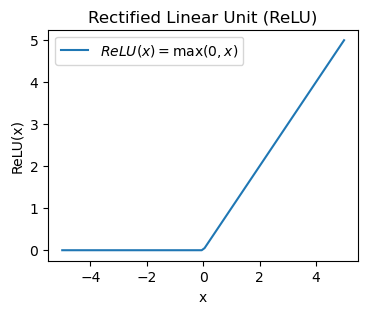

In [20]:
#region Hidden code

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Create a range of x values
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(4,3))
# Plot the ReLU function
plt.plot(x, relu(x))

# Add the formula as the legend
plt.legend([r'$ReLU(x) = \max(0,x)$'])
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Rectified Linear Unit (ReLU)')

# Show the plot
plt.show()

#endregion

One disadvantage of the ReLU is that the derivative is equal to zero when z is negative. There is another activation function called Leaky ReLU function ($\alpha$ in the next plot equal to 0.1).

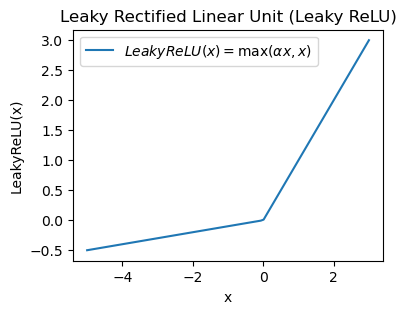

In [26]:
#region Hidden code
# Define the leaky ReLU function
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

# Create a range of x values
x = np.linspace(-5, 3, 100)

# Set the figure size
plt.figure(figsize=(4, 3))

# Plot the leaky ReLU function
plt.plot(x, leaky_relu(x))

# Add the formula as the legend
plt.legend([r'$LeakyReLU(x) = \max(\alpha x, x)$'], loc='upper left')

# Add axis labels and a title
plt.xlabel('x')
plt.ylabel('LeakyReLU(x)')
plt.title('Leaky Rectified Linear Unit (Leaky ReLU)')

# Show the plot
plt.show()
#endregion


 the advantage of both the $\text{ReLU}$ and the $\text{Leaky ReLU}$ is that for a lot of the space of z, the derivative of the activation function, the slope of the activation function is very different from zero. And so in practice, using the $\text{ReLU}$ activation function, your neural network will often learn much faster than when using the $\text{tanh}$ or the $\text{sigmoid}$ activation function. And the main reason is that there's less of this effect of the slope of the function going to zero, which slows down learning. 

### why do we need **non-linear** activation function?

A brief conclusion:  
It turns out that if you have a linear activation function here and a sigmoid function here, then this model is no more expressive than standard logistic regression without any hidden layer. The one place might use a linear activation function is usually in the output layer.

## Derivative of activation function

Here are derivatives of the 3 functions we mentioned.  

- $Sigmoid$ function:  
$\begin{array}{l}g(z)=\operatorname{sigmoid}(z)=\frac{1}{1+e^{-z}} \\ g^{\prime}(z)=g(z)(1-g(z)) \\ \text {if } a=\operatorname{sigmoid}(z) \text{,} \quad g^{\prime}(z)=a(1-a)\end{array}$  
  
- $tanh$ function:  
$\begin{array}{l}g(z)=\tanh (z)=\frac{e^z-e^{-z}}{e^z+e^{-z}} \\ g^{\prime}(z)=1-(\tanh (z))^2 \\ \text {if } a=\tanh (z), \quad g^{\prime}(z)=1-a^2\end{array}$
    
- $ReLU$ function:  
$\begin{array}{l}g(z)=\operatorname{ReLU}(z)=\max \left(0, z \right) \\ g^{\prime}(z)=\left\{\begin{array}{l}0, \text { if } z<0 . \\ 1, \text { if } z > 0 . \\ \text {undefined, if } z=0 .\end{array}\right. \end{array}$

- $Leaky \  ReLU$ function:  
$\begin{array}{l}g(z)= \max \left(0.01z, z \right) \\ g^{\prime}(z)=\left\{\begin{array}{l}0.01, \text { if } z<0 . \\ 1, \text { if } z > 0 . \\ \text {undefined, if } z=0 .\end{array}\right. \end{array}$

## Gradient Desent for Neural Networks

| Parameters: | $w^{[1]}$ | $b^{[1]}$ | $w^{[2]}$ | $b^{[2]}$ |
| :---: | :---: | :---: | :---: | :---: |
| dimensions: | $\left(n^{[1]}, n^{[2]}\right)$ | $\left(n^{[2]}, 1\right)$ | $\left(n^{[2]}, n^{(n)}\right)$ | $\left(n^{[2]}, 1\right)$ |  
  
Cost function: $J\left(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}\right)=\frac{1}{m} \sum_{i=1}^m L(\hat{y}, y)$   

Rember that we initialize parameters randomly rather than all zeros. <span style="color: red">**Let us see what happens if we initialize weights to zero.**</span>  

Repeat the following process:  
  
compute predictions $\hat{y}^{(i)}, \ [-1, m-1] \\ d w^{[1]}=\frac{\partial J}{\partial w^{[1]}}, d b^{[1]}=\frac{\partial}{\partial b^{[1]}}, \  \cdots \\ w^{[1]}=w^{[1]}-\alpha d w^{[1]} \\ b^{[1]}=b^{[1]}-\alpha d b^{[1]} \\ w^{[2]}=\cdots, b^{[2]}=\cdots$


**formulas for computing derivatives**  
Forward propagation:  
$
\begin{array}{l}
Z^{[1]}=W^{[1]} X+b^{[1]} \\
A^{[1]}=g^{[1]}\left(Z^{[1]}\right) \\
Z^{[2]}=W^{[2]} A^{[1]}+b^{[2]} \\
A^{[2]}=g^{[2]}\left(Z^{[2]}\right)=\sigma\left(Z^{[2]}\right)
\end{array}
$  

Back propagation:  
<img src="images/backpropagation.png" width="600">

### backpropagation intuition

we are going to go over some intuition using the computation graph for how those equations were derived.  

- logistic regression:  
    
  forward propagation  
  <img src="images/logisticregression.png" width="600">  

  back propagation  
  <img src="images/bp.png" width="600"> 


<span style="color: red">**&#x2460;**</span> : $\quad d a=\frac{d \mathcal{L}(a, y)}{d a}=-\frac{y}{a}+\frac{1-y}{1-a}$  
<span style="color: red">**&#x2461;**</span> : $\quad d z=\frac{d L(a, y)}{d z}=\frac{d L(a, y)}{d a} \cdot \frac{d a}{d z}=a-y$  
<span style="color: red">**&#x2462;**</span> : $\quad d w=\frac{d L(a, y)}{d w}=\frac{d L(a, y)}{d a} \cdot \frac{d a}{d z} \cdot \frac{d z}{d w}=x \cdot d z$  
$ \qquad \  \  d b=\frac{d L(a, y)}{d b}=\frac{d L(a, y)}{d a} \cdot \frac{d a}{d z} \cdot \frac{d z}{d b}=d z $  

In supervised learning, we do not bother optimize x.

<img src="images/2layernn.png" width="800">  
<img src="images/2layernnback.png" width="800"> 

<span style="color: navy">**&#x2461;**</span>: $d z^{[2]}=a^{[2]}-y $  
<span style="color: navy">**&#x2462;**</span>: $d W^{[2]}=d z^{[2]} a^{[1]T} , \  d b^{[2]}=d z^{[2]} $  
<span style="color: navy">**&#x2464;**</span>: $d z^{[1]}=W^{[2] T} d z^{[2]} * g^{[1]\prime} \left(z^{[1]}\right) $  
<span style="color: navy">**&#x2465;**</span>: $d W^{[1]}=d z^{[1]} x^T , \  d b^{[1]}=d z^{[1]}$  

So, the vectorization summary of above process is show as following:  

<img src="images/sumvec2layernn.png" width="400">

In [29]:
A = np.random.randn(4,3)

B = np.sum(A, axis = 1, keepdims = True) 

print(B.shape)

(4, 1)
